<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE6_LSE.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

# ❄️ ICE6: Least Squares 

**A note on this document**
This document is known as a Jupyter notebook; it is used in academia and industry to allow text and executable code to coexist in a very easy to read format. Blocks can contain text or executable code. To run the executable code in this notebook, click <a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE6_LSE.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>
. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

Consider a set of measurements $\mathbf{y} = (y_1, y_2, \cdots, y_n)$ and $\mathbf{x} = (x_1, x_2, \cdots, x_n)$.

We want to find $m$ and $b$ such that our linear model, $y = mx+b$, best fits the measurements.

Let's plot the measurements.

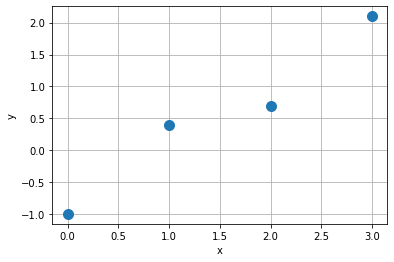

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.4, 0.7, 2.1])

plt.plot(x, y, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.show()

First, we can rewrite the line equation as $y = \mathbf{c} \cdot \mathbf{q}$, where

$\mathbf{c} = \begin{bmatrix} x & 1\end{bmatrix}$ and $\mathbf{q} = \begin{bmatrix} m \\ b\end{bmatrix} $. That is,

$y = mx + b = \begin{bmatrix} x & 1\end{bmatrix} \begin{bmatrix} m \\ b\end{bmatrix} = \mathbf{c} \cdot \mathbf{q}$ 

Given $\mathbf{x} = (x_1, x_2, \cdots, x_n)$ and $\mathbf{y} = (y_1, y_2, \cdots, y_n)$, we can obtain

$\begin{bmatrix} -1 \\ 0.4 \\ 0.7 \\ 2.1\end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\2 & 1 \\3 & 1 \end{bmatrix} \begin{bmatrix} m \\ b\end{bmatrix}$  or $\mathbf{y} = C\mathbf{q}$, 

where

$C = \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\x_3 & 1 \\x_4 & 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\2 & 1 \\3 & 1 \end{bmatrix} $.

We can create the $C$ matrix using `np.vstack`

In [10]:
# x is a row vector.
# vstack append a row vector, [1, 1, ,,, 1] at the end of x.
# It will be a 2 by n matrix.
# We need to transpose the 2 by n matrix to make it n by 2 matrix
C = np.vstack([x, np.ones(len(x))]).T
print(C)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


Now use lstsq to solve for b:

In [7]:
m, b = np.linalg.lstsq(C, y, rcond=None)[0]
print(m, b)

0.9599999999999997 -0.8899999999999996


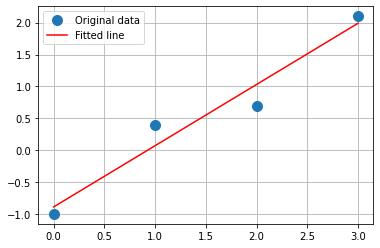

In [8]:
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.grid('on')
plt.show()